In [1]:
import torch

In [2]:
from torch.autograd import Function

# 5.24.4
class Sigmoid(Function):
    @staticmethod
    def forward(ctx, x):
        sig = 1 / (1 + torch.exp(-x))
        ctx.save_for_backward(sig)
        return sig
    
    @staticmethod
    def backward(ctx, grad_output):
        sig, = ctx.saved_tensors
        return grad_output * sig * (1 - sig)

In [45]:
x = torch.randn(3, requires_grad=True)
y = Sigmoid.apply(x)
y.backward(torch.ones_like(y))
x, y, x.grad

(tensor([ 0.4025, -0.3739,  1.0061], requires_grad=True),
 tensor([0.5993, 0.4076, 0.7323], grad_fn=<SigmoidBackward>),
 tensor([0.2401, 0.2415, 0.1961]))

In [44]:
# 5.24.5
class ReLU(Function):
    @staticmethod
    def forward(ctx, x):
        ctx.save_for_backward(x)
        return x.clamp(min=0)
       
    @staticmethod
    def backward(ctx, grad_output):
        x, = ctx.saved_tensors
        grad = grad_output.clone()
        grad[x < 0] = 0
        return grad
        
x = torch.randn(3, requires_grad=True)
y = ReLU.apply(x)
y.backward(torch.ones_like(y))
x, y, x.grad

(tensor([-1.6021,  1.2068,  0.6890], requires_grad=True),
 tensor([0.0000, 1.2068, 0.6890], grad_fn=<ReLUBackward>),
 tensor([0., 1., 1.]))

In [36]:
import numpy as np
test_x = np.array([0.37, 0.192, 0.571])
test_y = np.arctanh(test_x)
test_x, test_y


(array([0.37 , 0.192, 0.571]), array([0.3884231 , 0.19441289, 0.64900536]))

In [55]:
# 5.25
class Artanh(Function):
    @staticmethod
    def forward(ctx, x):
        ctx.save_for_backward(x)
        return torch.log_(1 + x).sub_(torch.log_(1 - x)).mul_(0.5)
    
    @staticmethod
    def backward(ctx, grad_output):
        x, = ctx.saved_tensors
        return grad_output / (1 - torch.pow(x, 2))
    
x = torch.tensor([0.37, 0.192, 0.571], requires_grad=True, dtype=torch.double)
y = Artanh.apply(x)
y.backward(torch.ones_like(y))
x, y, x.grad

(tensor([0.3700, 0.1920, 0.5710], dtype=torch.float64, requires_grad=True),
 tensor([0.3884, 0.1944, 0.6490], dtype=torch.float64, grad_fn=<ArtanhBackward>),
 tensor([1.1586, 1.0383, 1.4838], dtype=torch.float64))

In [58]:
torch.autograd.gradcheck(Artanh.apply, torch.tensor(test_x, requires_grad=True, dtype=torch.double))

True

In [3]:
# 5.27.5
import jax
import jax.numpy as jnp

def jax_fn(x):
    return 3 * x + 2

jax_fn(2.), jax.grad(jax_fn)(2.)

(8.0, Array(3., dtype=float32, weak_type=True))

In [5]:
def fn2(x):
    return 5*x**2 + 4*x + 1
fn2(5.), jax.grad(fn2)(5.)

(146.0, Array(54., dtype=float32, weak_type=True))

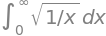

In [6]:
import sympy as sp
from sympy import *
init_printing()
x, y, z = symbols('x y z')
Integral(sqrt(1/x), (x, 0, oo))